# Laplace's equation

In [4]:
# Import libraries.
from matplotlib import pyplot, cm
from mpl_toolkits import mplot3d
import numpy

%matplotlib inline

In [5]:
# Change default font family and size for Matplotlib figures.
pyplot.rc('font', family='serif', size=16)

## Problem setup

Solve the Laplace's equation $\nabla^2 u = 0$ in the domain $\Omega = \left[ 0, L_x \right] \times \left[ 0, L_y \right]$

<img src="figures/application_setup.png" alt="application_setup" width="300"/>

Initial guess: $u = 0$ everywhere inside the domain.

## Analytical solution

$$
u \left( x, y \right) = \frac{\sinh \left( \frac{3}{2} \pi \frac{y}{L_y} \right)}{\sinh \left( \frac{3}{2} \pi \frac{L_x}{L_y} \right)} \sin \left( \frac{3}{2} \pi \frac{x}{L_x} \right)
$$

In [23]:
def laplace_solution(x, y, Lx, Ly):
    """Return the analytical solution.

    Parameters
    ----------
    x : numpy.ndarray
        Coordinates along the x direction as a 1D array of floats.
    y : numpy.ndarray
        Coordinates along the y direction as a 1D array of floats.
    Lx : float
        Length of the domain in the x direction.
    Ly : float
        Length of the domain in the y direction.

    Returns
    -------
    u : numpy.ndarray
        The analytical solution as a 2D array of floats.

    """
    nx, ny = x.size, y.size
    u = numpy.empty((ny, nx))
    c = 3 / 2 * numpy.pi
    for j in range(ny):
        for i in range(nx):
            u[j, i] = (numpy.sinh(c * y[j] / Ly) * 
                       numpy.sin(c * x[i] / Lx) /
                       numpy.sinh(c * Ly / Lx))
    return u

In [24]:
def plot_3d(x, y, u, label='$z$', elev=30.0, azim=45.0):
    """Create a 3D surface plot of the scalar field `u`.

    Parameters
    ----------
    x : numpy.ndarray
        Gridline locations in the x direction as a 1D array of floats.
    y : numpy.ndarray
        Gridline locations in the y direction as a 1D array of floats.
    u : numpy.ndarray
        Scalar field to plot as a 2D array of floats.
    label : string, optional
        Axis label to use in the third direction; default: 'z'.
    elev : float, optional
        Elevation angle in the z plane; default: 30.0.
    azim : float, optional
        Azimuth angle in the x,y plane; default: 45.0.

    """
    fig = pyplot.figure(figsize=(8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel(label)
    X, Y = numpy.meshgrid(x, y)
    ax.plot_surface(X, Y, u, cmap=cm.viridis)
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(y[0], y[-1])
    ax.view_init(elev=elev, azim=azim)

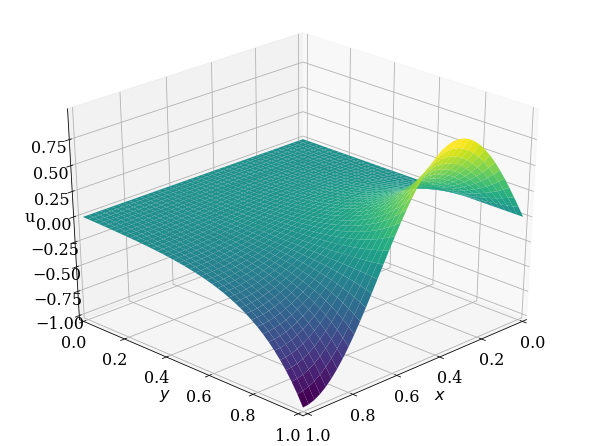

In [25]:
# Set parameters.
Lx, Ly = 1.0, 1.0  # lengths of the domain
nx, ny = 41, 41  # number of points along each direction

# Define grid-point locations.
x = numpy.linspace(0.0, Lx, num=nx)
y = numpy.linspace(0.0, Ly, num=ny)

u_exact = laplace_solution(x, y, Lx, Ly)
plot_3d(x, y, u_exact, label='u')

## Initial solution

<img src="figures/application_setup.png" alt="application_setup" width="300"/>

Initial guess: $u = 0$ everywhere inside the domain.

Boundary values:

* Bottom and left: $u = 0$
* Top: $u = \sin \left( \frac{3}{2} \pi \frac{x}{L_x} \right)$
* Right: $\frac{\partial u}{\partial x} = 0$

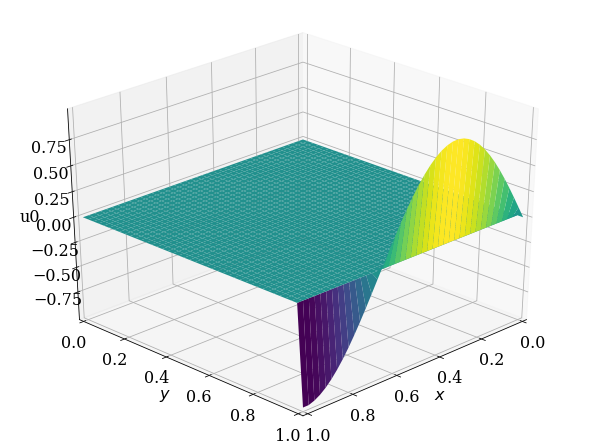

In [30]:
###
# To do: Set the initial guess `u0`.
###
u0 = numpy.zeros((ny, nx))
u0[-1, :] = numpy.sin(3/2 * numpy.pi * x / Lx) # Top boundary: Dirichlet
u0[:, -1] = u0[:, -2] # Right boundary: Neumann condition, not really needed
# bottom and left boundaries: Dirichlet with u=0 so nothing to do

###
# To do: Plot the initial guess.
###
plot_3d(x, y, u0, label='u0')

## Jacobi method

$$
u_{i, j}^{k+1} = \frac{1}{4} \left( u_{i, j-1}^k + u_{i-1, j}^k + u_{i+1, j}^k + u_{i, j+1}^k \right)
$$

In [31]:
def laplace_2d_jacobi(u0, maxiter=20000, rtol=1e-8):
    """Solve the 2D Laplace equation using Jacobi method.

    Parameters
    ----------
    u0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform; default: 20000.
    rtol : float, optional
        Relative tolerance for convergence; default: 1e-8.

    Returns
    -------
    u : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations computed.
    diff : float
        The final relative L2-norm of the difference.

    """
    u = u0.copy()  # create copy to not overwrite initial guess
    diff = rtol + 1.0  # initialize residual to "high" value
    ite = 0  # initialize iteration index
    while diff > rtol and ite < maxiter:
        un = u.copy()  # store the solution at previous iteration
        ite += 1  # update the iteration index
        ###
        # To do: Update the solution using Jacobi method.
        # To do: Update the value at boundaries (where necessary).
        # To do: Compute `diff`, the relative L2-norm of the difference
        # in the solution between two successive iterations.
        ###
        u[1:-1, 1:-1] = 0.25 * (un[1:-1, :-2] + un[1:-1, 2:] + 
                                un[:-2, 1:-1] + un[2:, 1:-1])
        u[:, -1] = u[:, -2] # Update right boundary (neumann)
        diff = numpy.linalg.norm(u - un) / numpy.linalg.norm(un)
        
    return u, ite, diff

4473 9.989969530375405e-09
7257 9.99073982485903e-09


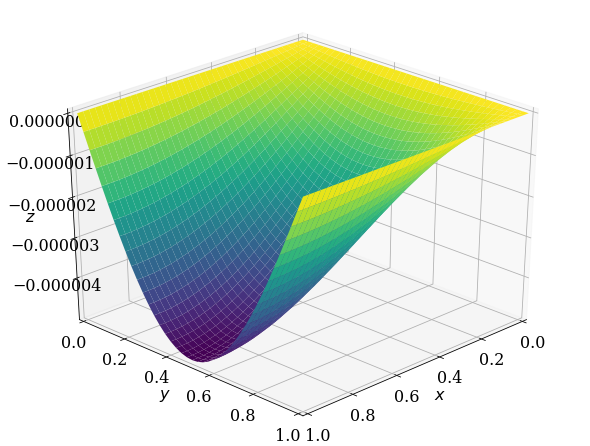

In [36]:
###
# To do: Compute the numerical solution of the Laplace equation.
# Question: How many iterations was needed?
# Question: What's the value of the final residual?
###
u, ites, diff = laplace_2d_jacobi(u0)
print(ites, diff)

u0_2 = u0.copy()
u0_2[1:-1, 1:-1] = 2.0
u_2, ites_2, diff_2 = laplace_2d_jacobi(u0_2)
print(ites_2, diff_2)

plot_3d(x, y, u-u_2)

## Convergence analysis

In [39]:
# List of grid-spacing sizes to investigate.
dx_vals = [0.1, 0.05, 0.025, 0.0125]

# Empty list to store the error on each grid.
errors = []

for dx in dx_vals:
    ###
    # To do: Re-create the space grid.
    # To do: re-set the initial guess.
    # To do: Relax the solution with Jacobi.
    # To do: Compute the analytical solution.
    # To do: Compute and append the relative L2 error to `errors`.
    ###
    nx = int(Lx / dx) + 1
    ny = int(Ly / dx) + 1
    x = numpy.linspace(0.0, Lx, num=nx)
    y = numpy.linspace(0.0, Ly, num=ny)
    
    u0 = numpy.zeros((ny, nx))
    u0[-1, :] = numpy.sin(3 / 2 * numpy.pi * x / Lx)
    
    u, ites, diff = laplace_2d_jacobi(u0)
    print(nx, ites, diff)
    
    ue = laplace_solution(x, y, Lx, Ly)
    
    error = numpy.linalg.norm(u - ue)/numpy.linalg.norm(ue)
    
    errors.append(error)

11 402 9.910588883069873e-09
21 1374 9.966538638306416e-09
41 4473 9.989969530375405e-09
81 13669 9.998671359447992e-09


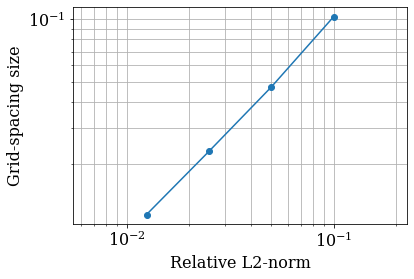

In [43]:
###
# To do: Plot (loglog) the error versus the grid-spacing size.
# Question: What's the order of convergence?
###
pyplot.figure()
pyplot.xlabel('Relative L2-norm')
pyplot.ylabel('Grid-spacing size')
pyplot.grid(which='both')
pyplot.loglog(dx_vals, errors, marker='o')
pyplot.axis('equal');

## 2nd-order Neumann boundary conditions

In [52]:
def laplace_2d_jacobi_neumann(u0, maxiter=20000, rtol=1e-8):
    """Solve the 2D Laplace equation using Jacobi method.

    Use a second-order approximation for Neumann boundary conditions.

    Parameters
    ----------
    u0 : numpy.ndarray
        The initial solution as a 2D array of floats.
    maxiter : integer, optional
        Maximum number of iterations to perform; default: 20000.
    rtol : float, optional
        Relative tolerance for convergence; default: 1e-8.

    Returns
    -------
    u : numpy.ndarray
        The solution after relaxation as a 2D array of floats.
    ite : integer
        The number of iterations performed.
    diff : float
        The final relative L2-norm of the difference.

    """
    u = u0.copy()  # create copy to not overwrite initial guess
    diff = rtol + 1.0  # initialize residual to "high" value
    ite = 0  # initialize iteration index
    while diff > rtol and ite < maxiter:
        un = u.copy()  # store the solution at previous iteration
        ite += 1  # update the iteration index
        ###
        # To do: Update the solution using Jacobi method.
        # To do: Update the value at boundaries (where necessary).
        # To do: Compute `diff`, the relative L2-norm of the difference
        # in the solution between two successive iterations.
        ###
        # Update values at interior points
        u[1:-1, 1:-1] = 0.25 * (un[1:-1, :-2] + un[1:-1, 2:] + 
                                un[:-2, 1:-1] + un[2:, 1:-1])
        # Update value at right boundary using second-order Neumann condition
        N = -1
        for j in range(1, ny - 1):
            u_N_minus_1 = u[j, N - 1] # left neighbor
            u_N_plus_1 = u_N_minus_1 + 0.0 * 2 * dx
            # Use Jacobi eqn to update boundary value
            u[j, N] = 0.25 * (u_N_minus_1 + u_N_plus_1 +
                              un[j - 1, N] + un[j + 1, N])
        diff = numpy.linalg.norm(u - un) / numpy.linalg.norm(un)
    return u, ite, diff

## Re-do convergence analysis

In [53]:
# List of grid-spacing sizes to investigate.
dx_vals = [0.1, 0.05, 0.025, 0.0125]

# Empty list to store the error on each grid.
errors = []

for dx in dx_vals:
    ###
    # To do: Re-create the space grid.
    # To do: re-set the initial guess.
    # To do: Relax the solution with Jacobi.
    # To do: Compute the analytical solution.
    # To do: Compute and append the relative L2 error to `errors`.
    ###
    nx = int(Lx / dx) + 1
    ny = int(Ly / dx) + 1
    x = numpy.linspace(0.0, Lx, num=nx)
    y = numpy.linspace(0.0, Ly, num=ny)
    
    u0 = numpy.zeros((ny, nx))
    u0[-1, :] = numpy.sin(3 / 2 * numpy.pi * x / Lx)
    
    u, ites, diff = laplace_2d_jacobi_neumann(u0)
    print(nx, ites, diff)
    
    ue = laplace_solution(x, y, Lx, Ly)
    
    error = numpy.linalg.norm(u - ue)/numpy.linalg.norm(ue)
    
    errors.append(error)   

11 348 9.79580520482844e-09
21 1187 9.987765047167381e-09
41 3776 9.992827048188942e-09
81 10964 9.999995902631047e-09


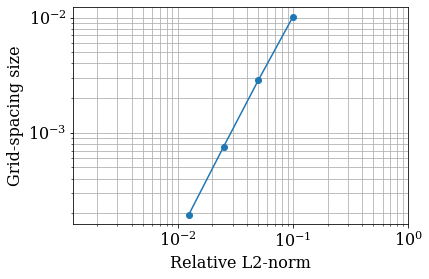

In [54]:
###
# To do: Plot (loglog) the error versus the grid-spacing size.
# Question: What's the order of convergence?
###
pyplot.figure()
pyplot.xlabel('Relative L2-norm')
pyplot.ylabel('Grid-spacing size')
pyplot.grid(which='both')
pyplot.loglog(dx_vals, errors, marker='o')
pyplot.axis('equal');